# **Visualize Dataset**

## Objectives

* The objective is to predict bike rental usage based on inputs such as temperature, humidity, wind speed... etc. 

## Inputs

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : wether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
    1. Clear, Few clouds, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are divided to 41 (max)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)


## Outputs

* cnt: count of total rental bikes including both casual and registered  

## Additional Comments

* Data Reference:

This Hadi Fanaee-T
Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal 


# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/BikeSharingRental/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/BikeSharingRental'

# Import Libraries

In [4]:
! pip install tensorflow-cpu==2.6.0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 MB 9.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 116.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 119.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 114.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 74.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 133.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 127.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.2/178.2 kB 38.2 MB/s eta 0:00:00
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30680 sha256=6edae4976437e50d394e0c3d1f19bc7fc60e8

# Load and Inspect data

In [5]:
bike = pd.read_csv('inputs/datasets/raw/bike_sharing_daily.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


<AxesSubplot:>

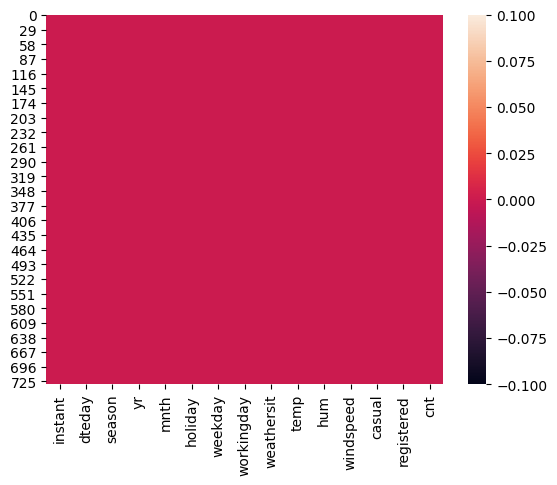

In [6]:
sns.heatmap(bike.isnull())

In [7]:
bike = bike.drop(labels= ['instant'], axis=1)

In [8]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [9]:
bike = bike.drop(labels= ['casual', 'registered'], axis = 1)
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [10]:
bike.dteday = pd.to_datetime(bike.dteday, format= '%m/%d/%Y')
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [11]:
bike.index = pd.DatetimeIndex(bike.dteday)
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


In [12]:
bike = bike.drop(labels= ['dteday'], axis=1)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


* Print out the Weekly Usage

In [13]:
def CtnWeekly():
    bike['cnt'].asfreq('W').plot(linewidth = 3)
    plt.title('Bike Usage Per week')
    plt.xlabel('Week')
    plt.ylabel('Bike Rental')

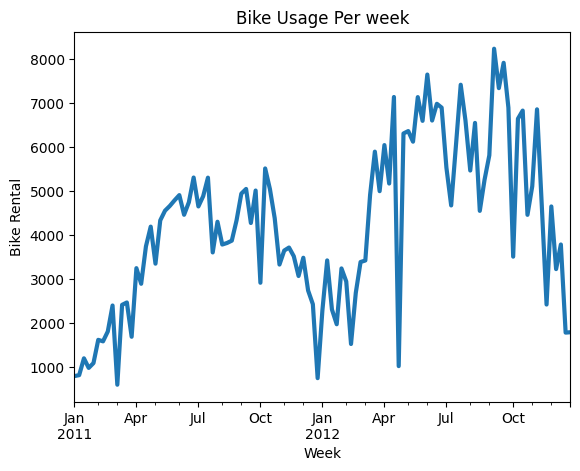

In [14]:
CtnWeekly()

* Bike usage per Month

Text(0, 0.5, 'Bike Rental')

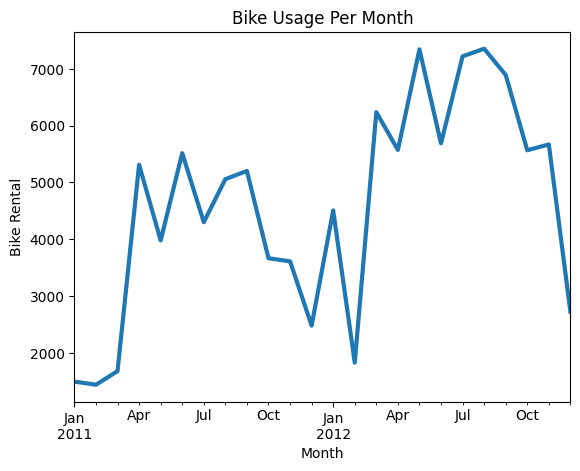

In [15]:
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Bike Usage Per Month')
plt.xlabel('Month')
plt.ylabel('Bike Rental')

* Bike usage Per Quarter

Text(0, 0.5, 'Bike Rental')

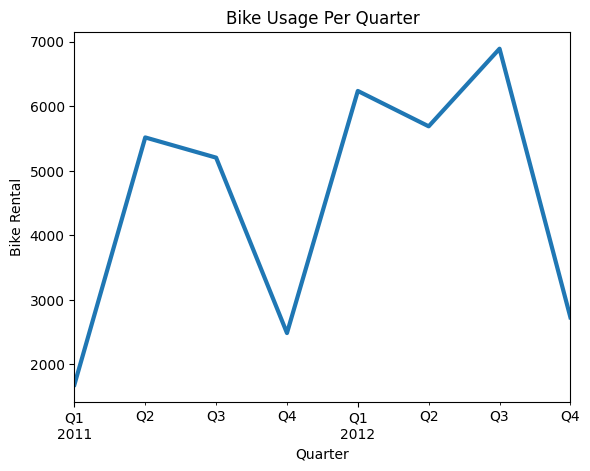

In [16]:
bike['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('Bike Usage Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Bike Rental')

# Visualise the entire Data

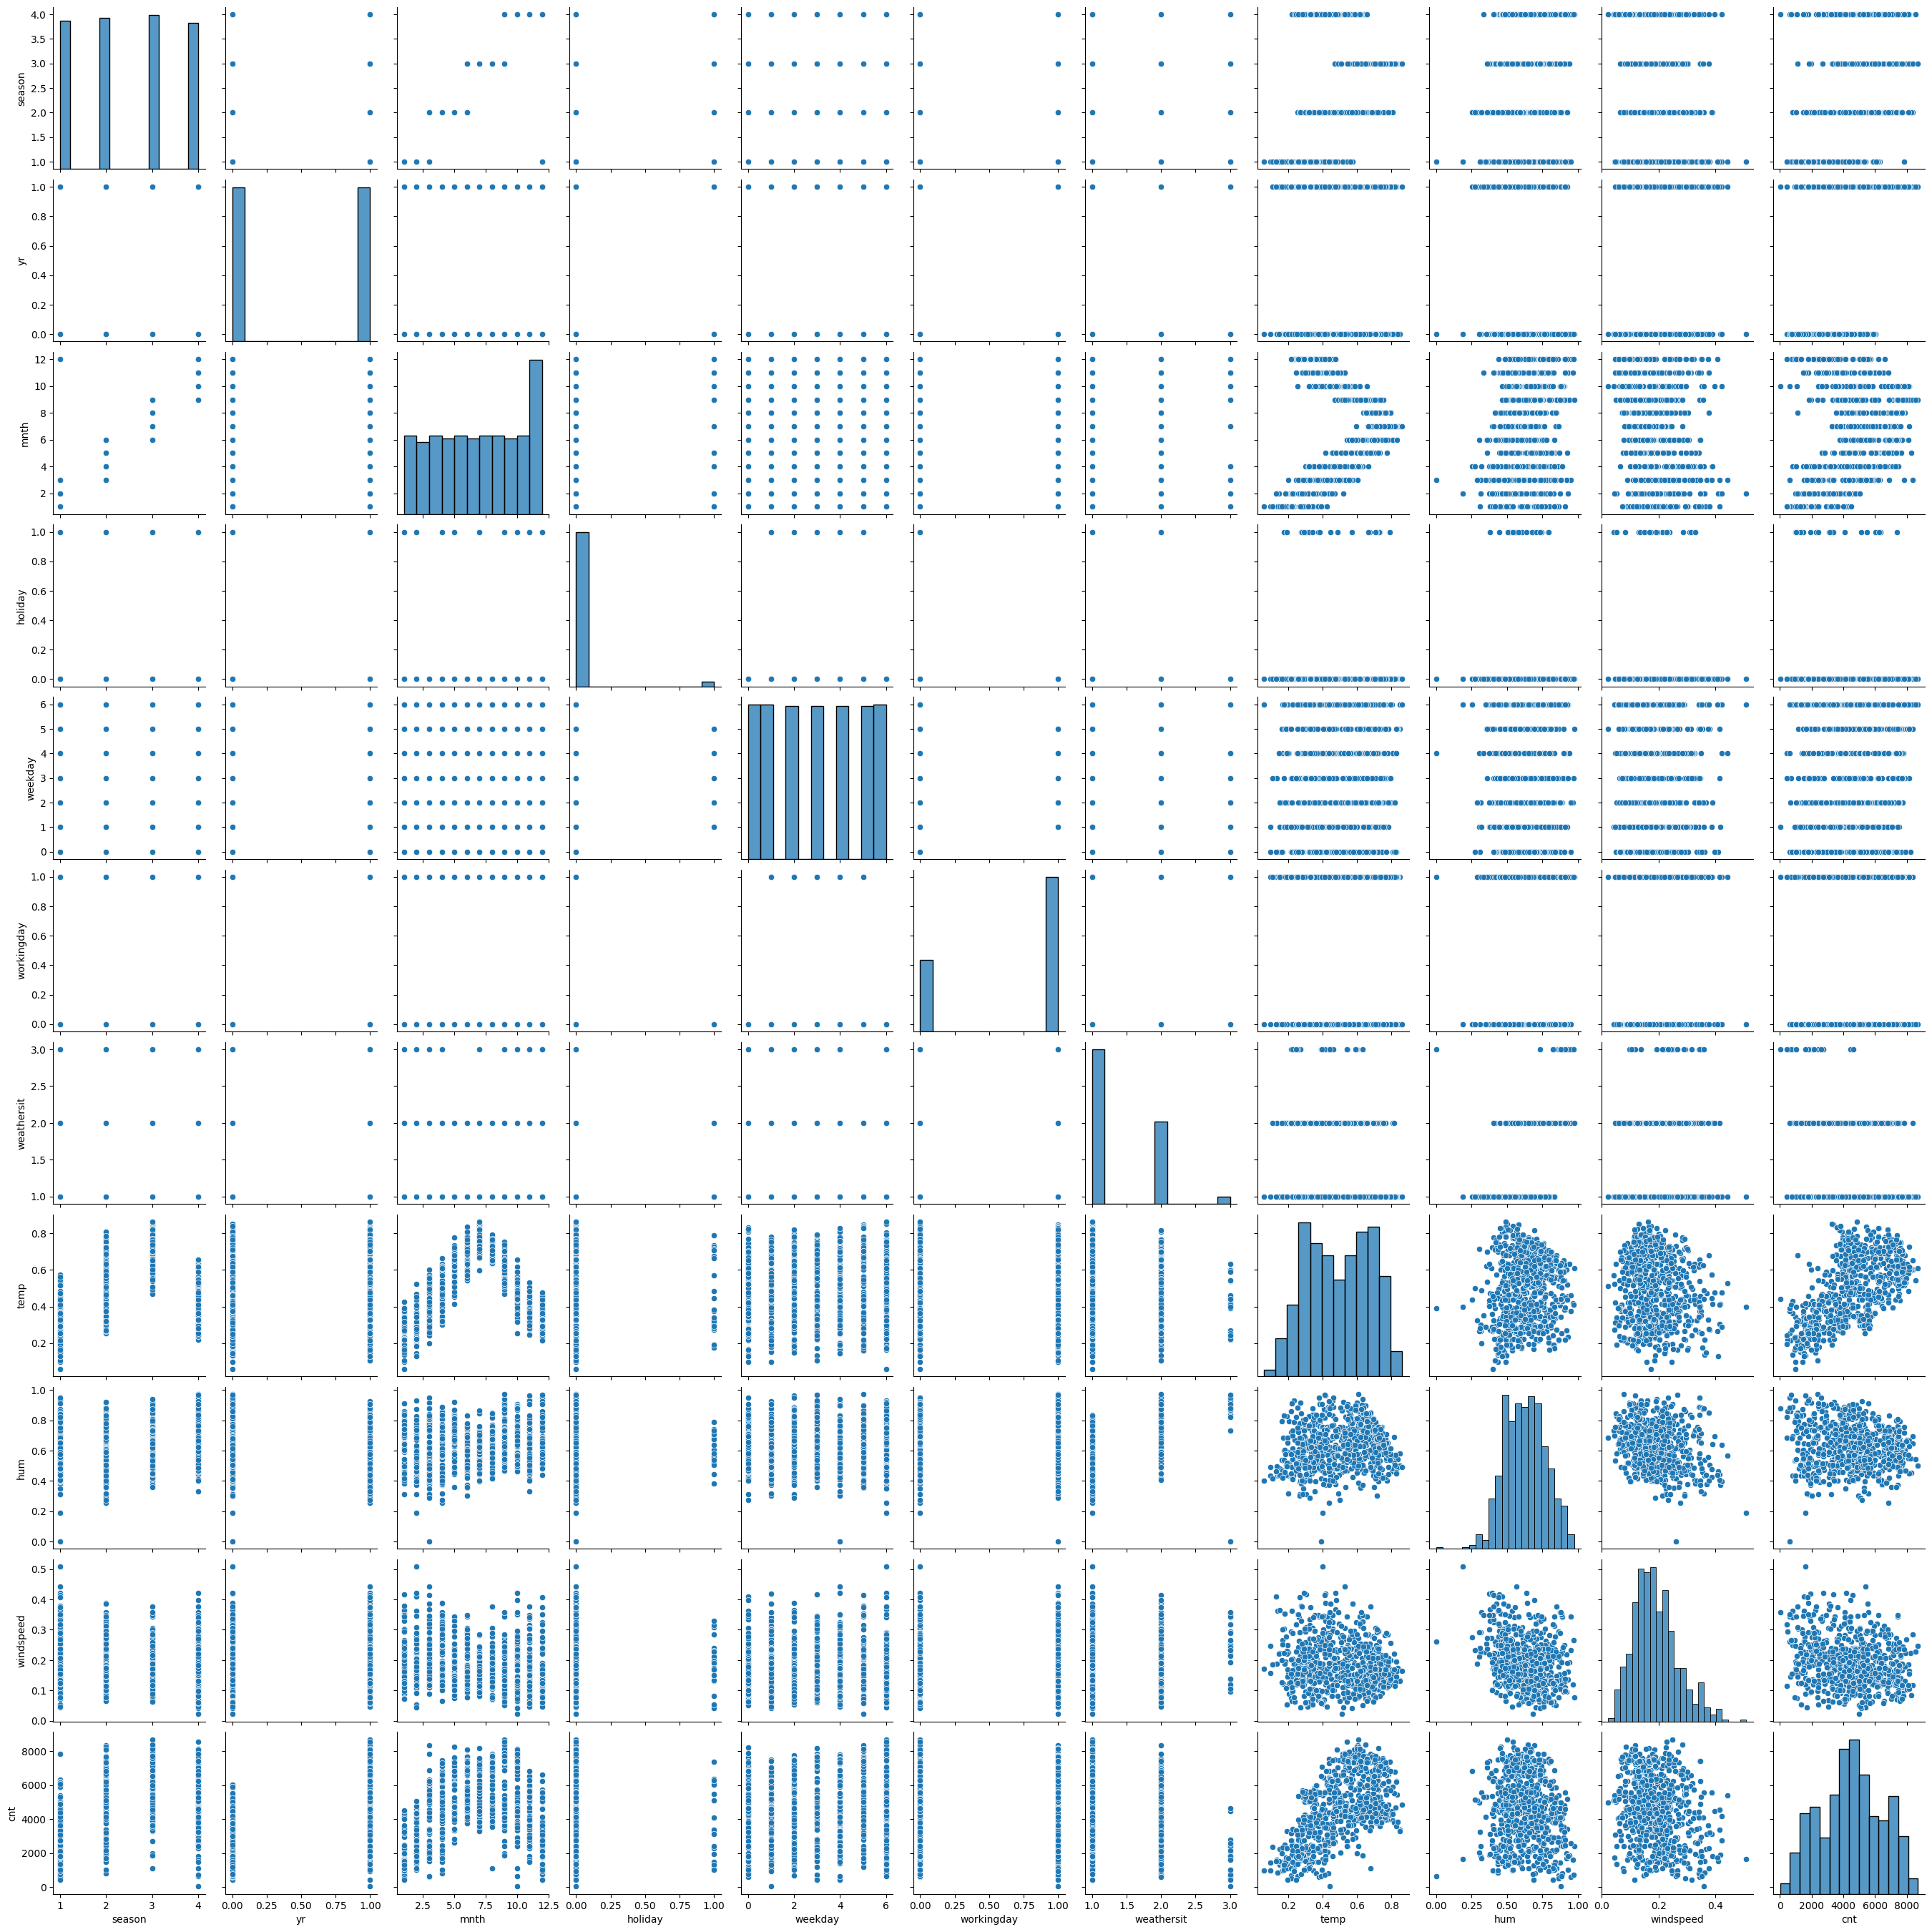

In [17]:
sns.pairplot(bike)

* Divide Data into Numerical and Categorical

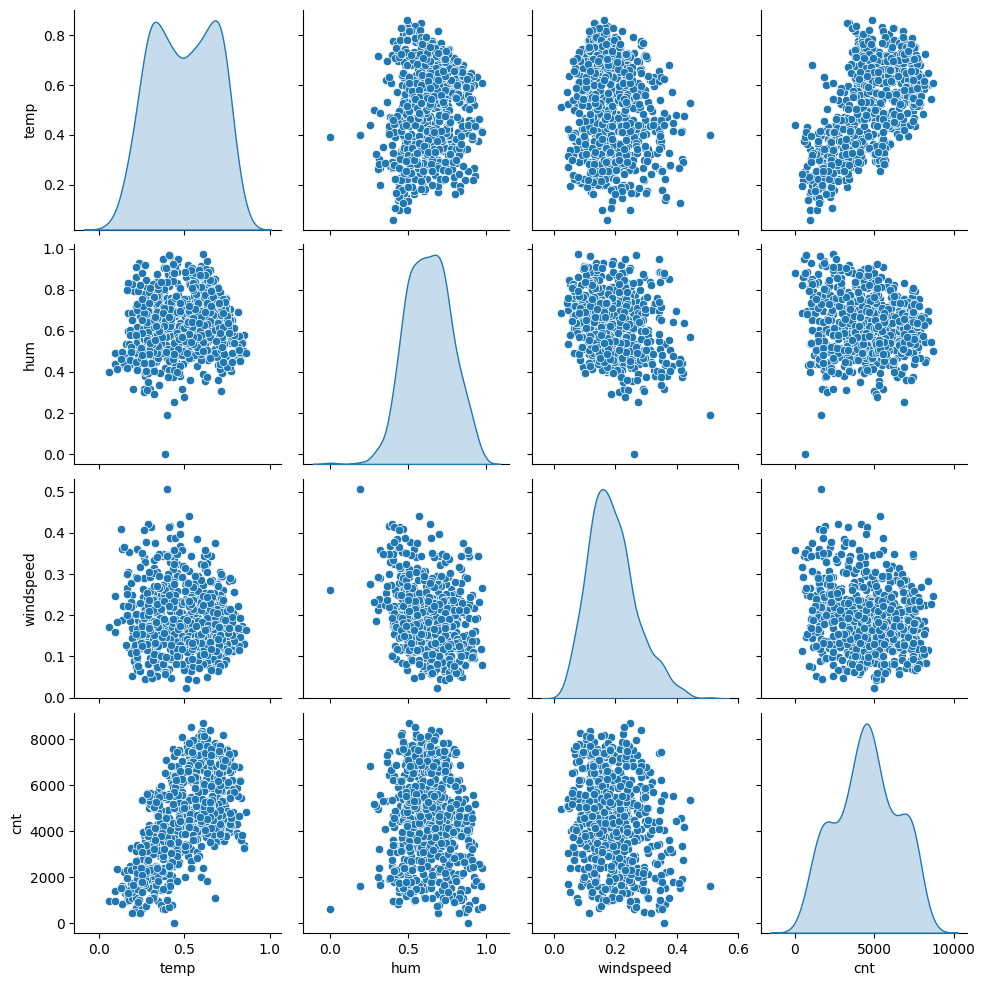

In [18]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(X_numerical, diag_kind='kde')
plt.show()

In [19]:
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


In [20]:
def show_distribution(var_data):
    fig,ax = plt.subplots(1,2,figsize=(8, 8))
    
    ax[0].hist(var_data, bins=100)
    ax[0].set_xlabel('Frequency')

    mean_val = var_data.mean()
    median_val = var_data.median()
    min_val = var_data.min()
    max_val =  var_data.max()
    mode_val = var_data.mode()[0]

    ax[0].axvline(mean_val, color = 'magenta' , linestyle='dashed', linewidth = 2)
    ax[0].axvline(median_val, color = 'black' , linestyle='dashed', linewidth = 2)

    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('value')

    fig.suptitle(var_data.name)

    fig.show()

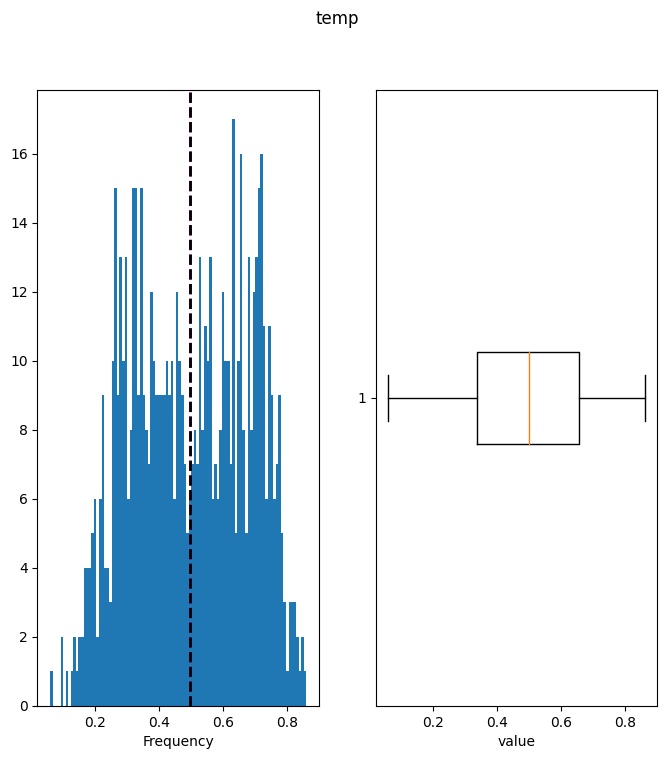

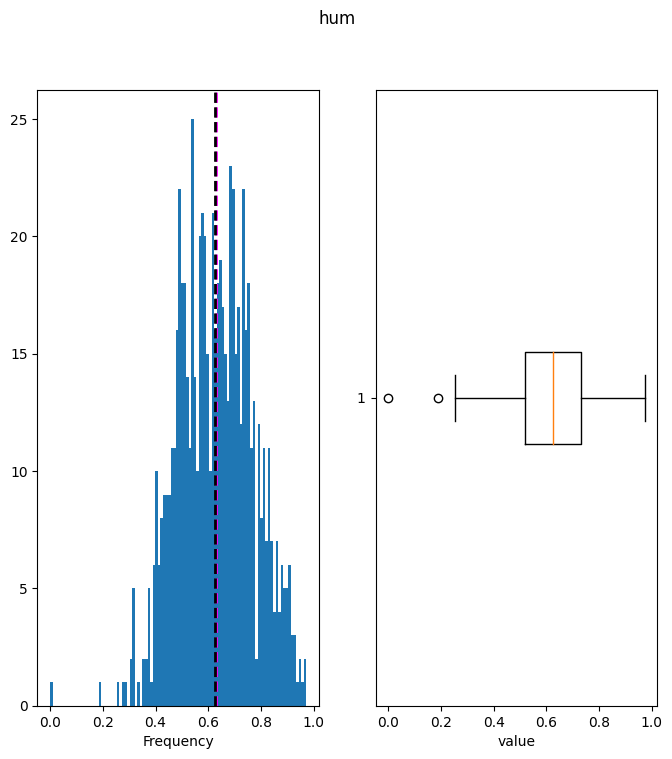

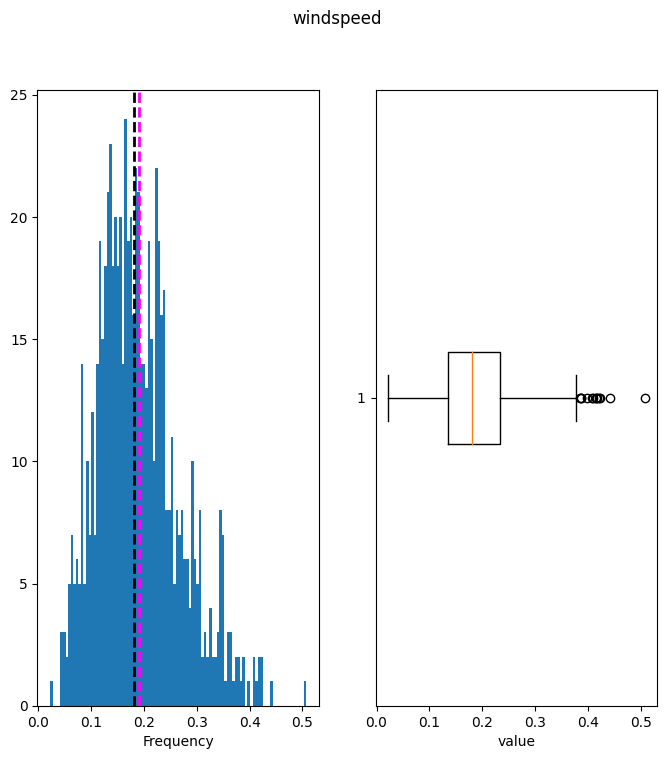

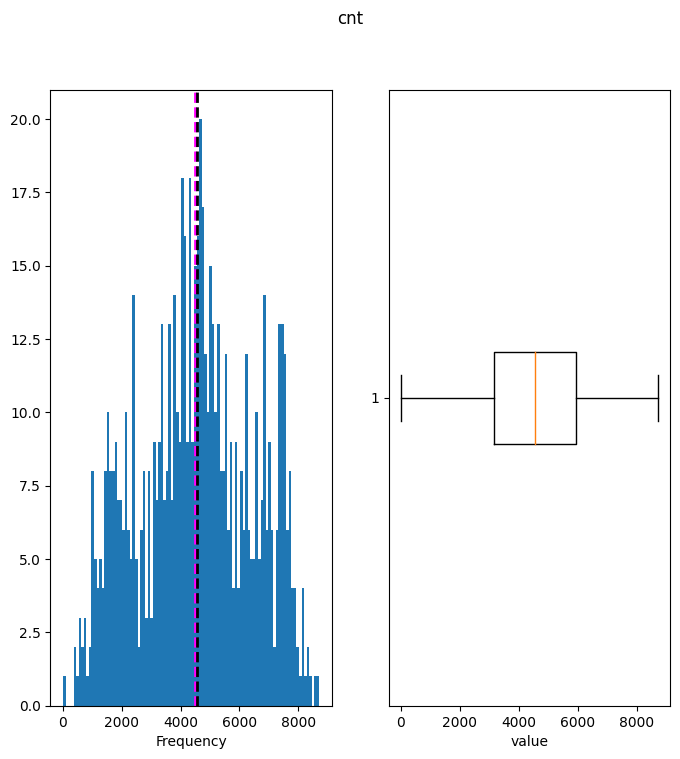

In [21]:
for col in X_numerical:
    show_distribution(X_numerical[col])

# Visualising Catagorical Variables

In [22]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [23]:
X_cat

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2
2012-12-28,1,1,12,0,5,1,2
2012-12-29,1,1,12,0,6,0,2


* Build boxplot of all categorical variables againt the target variable 'cnt' 
* to see how each of the predictor variable stackup against the target variable.

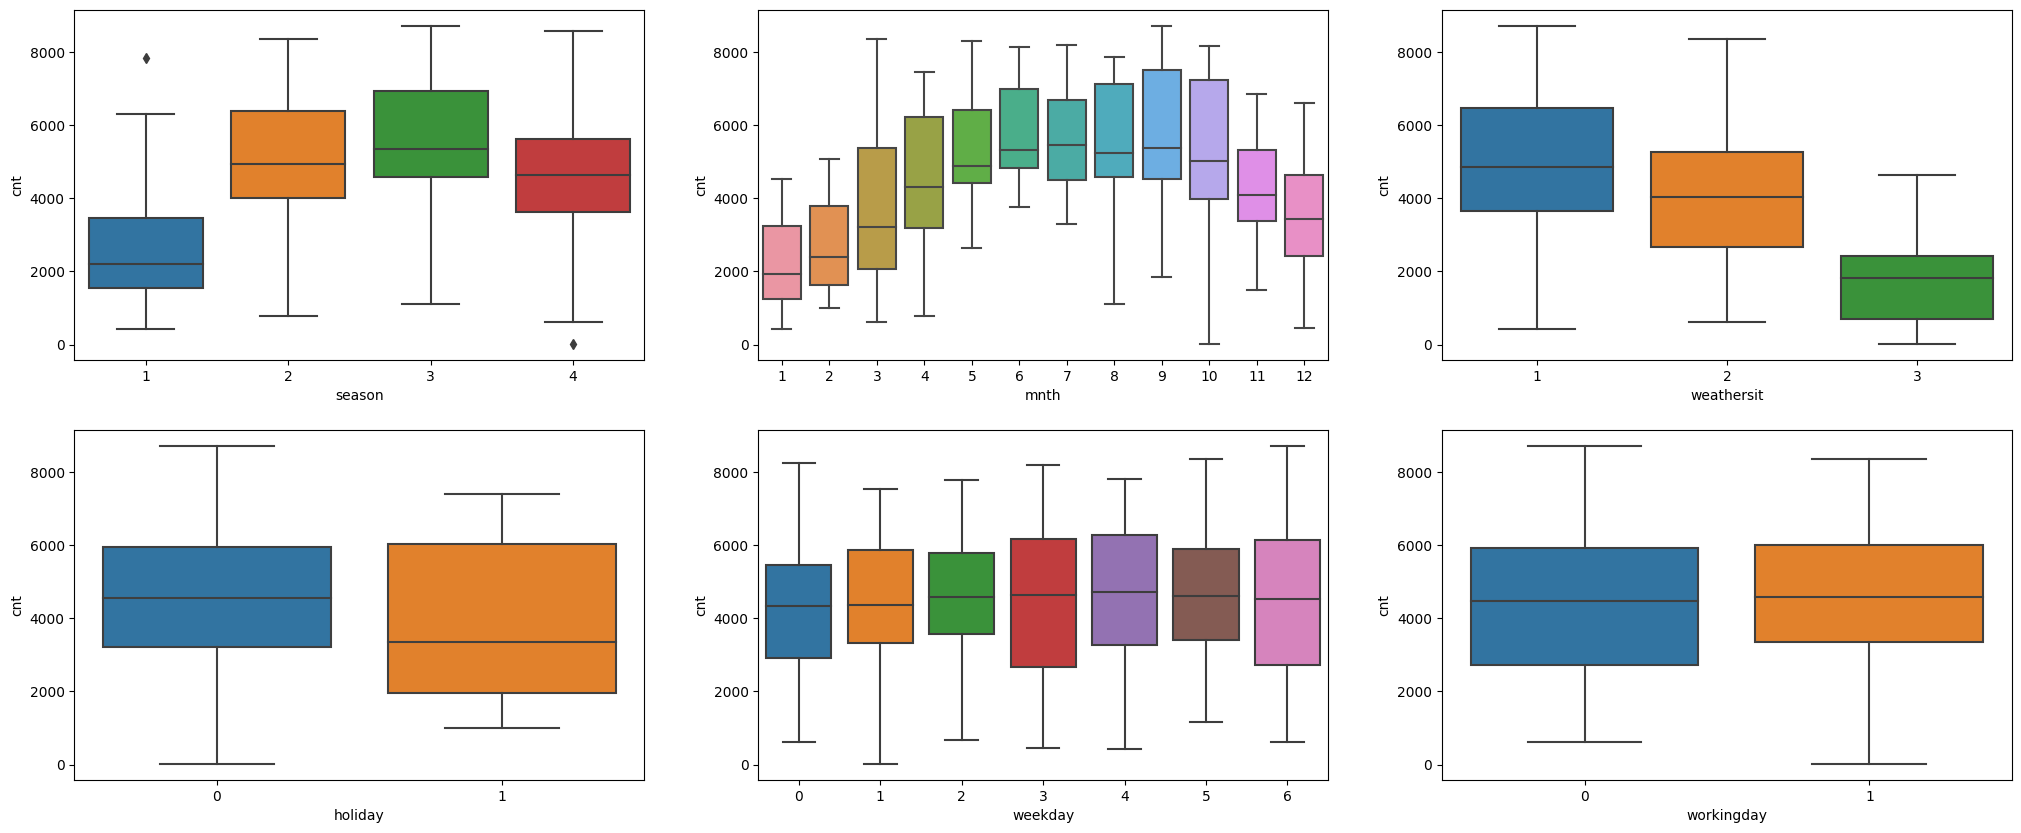

In [24]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

* Check categorical variables frequency

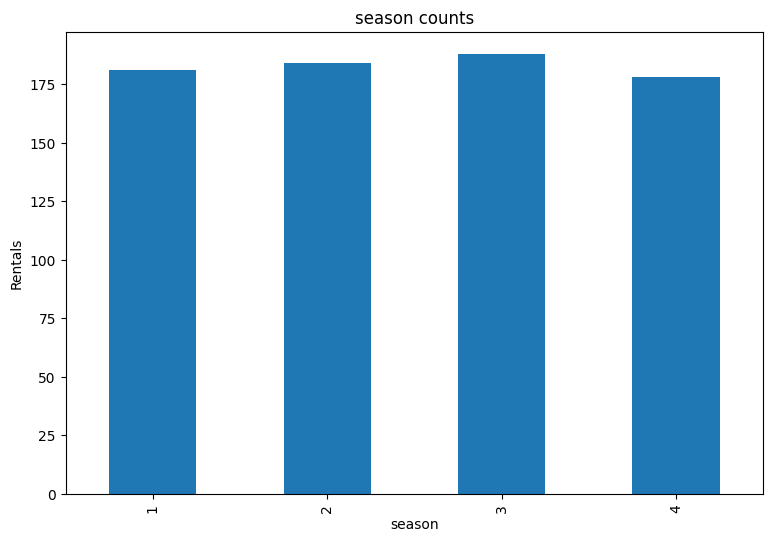

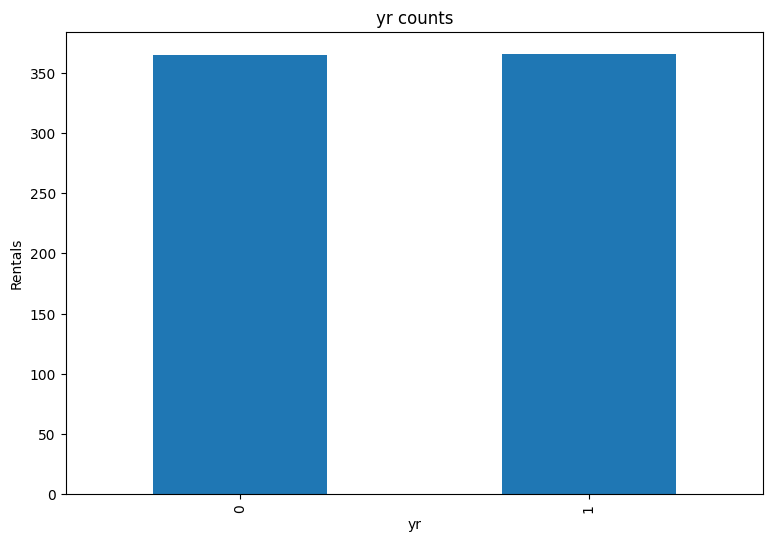

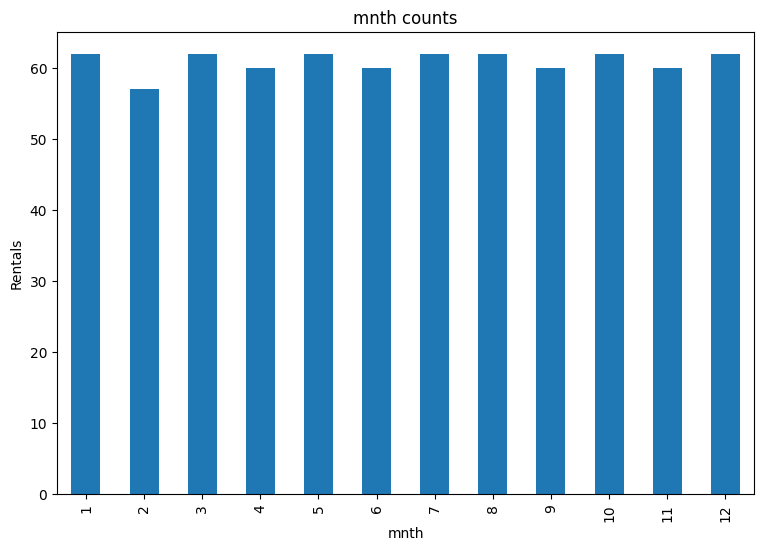

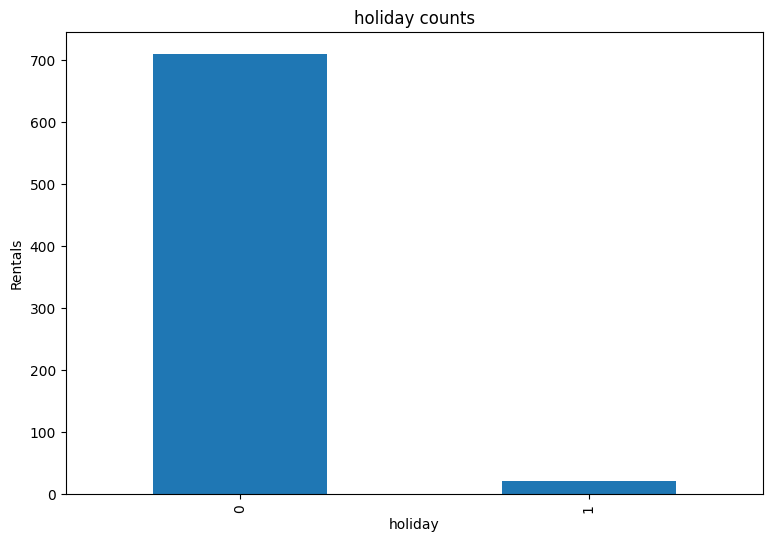

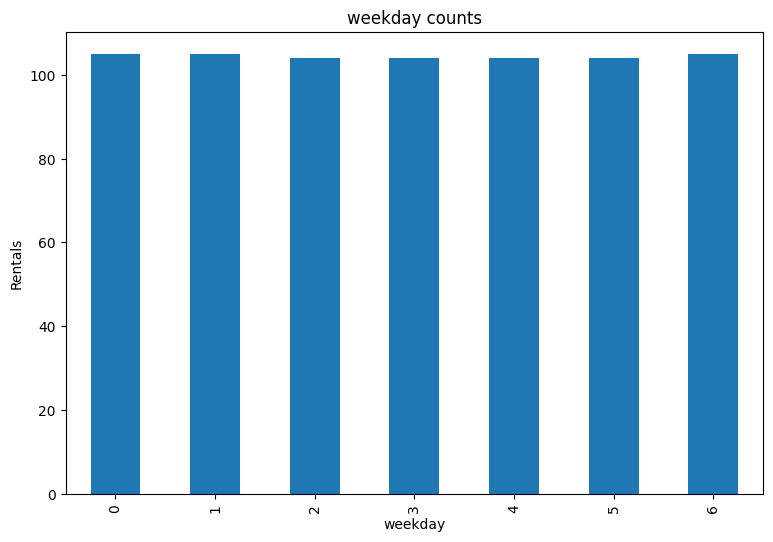

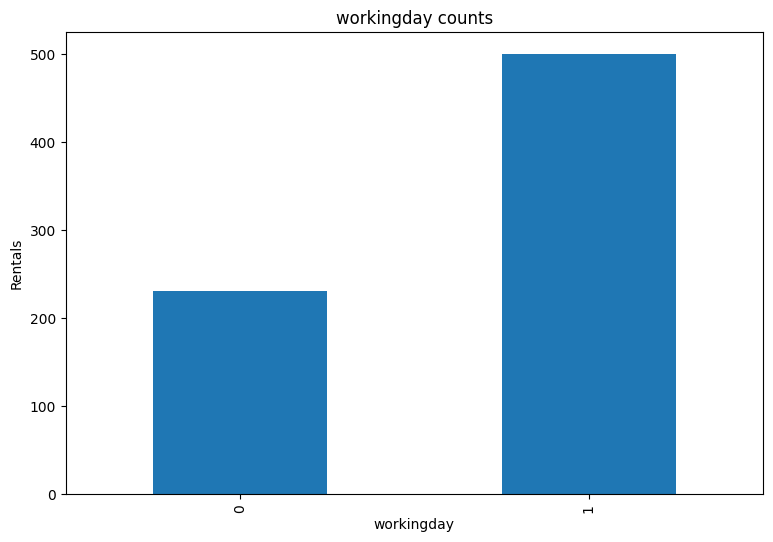

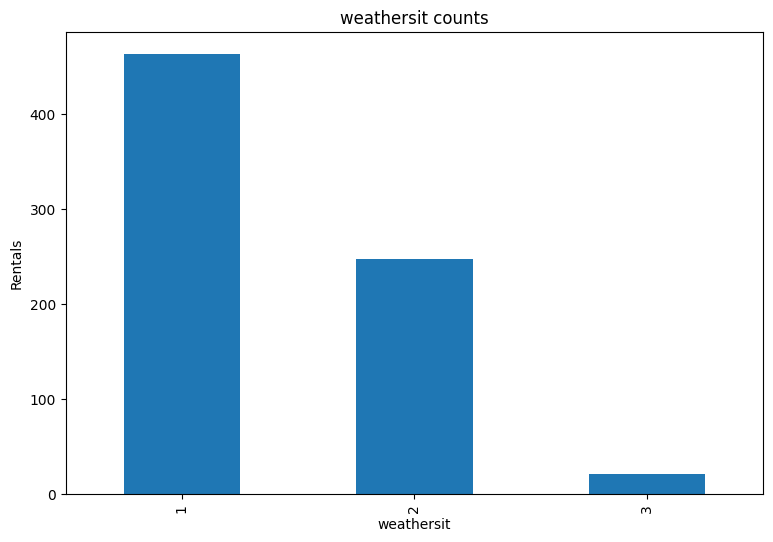

In [25]:
for col in X_cat:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    cat_count = bike[col].value_counts().sort_index()
    cat_count.plot.bar(x=col,y='Rentals')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel('Rentals')    
    plt.show()

# **Use Correlation**

* Find correlation between numerical variables with label using scatter charts

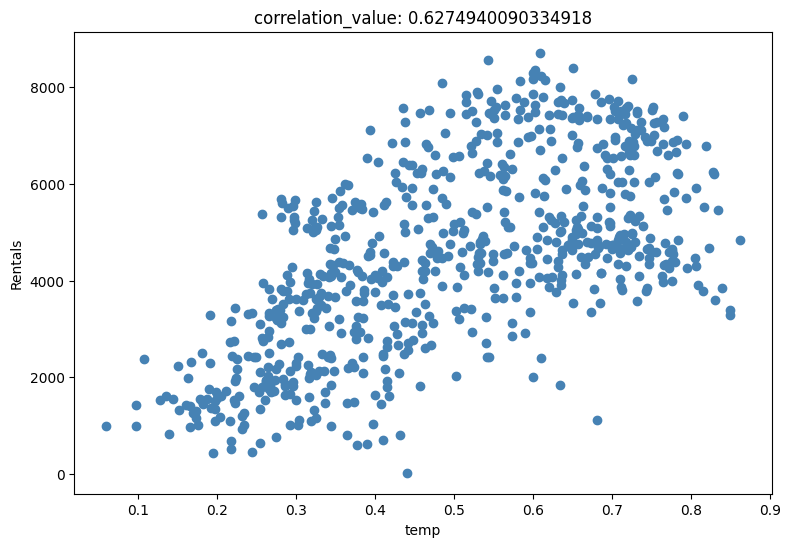

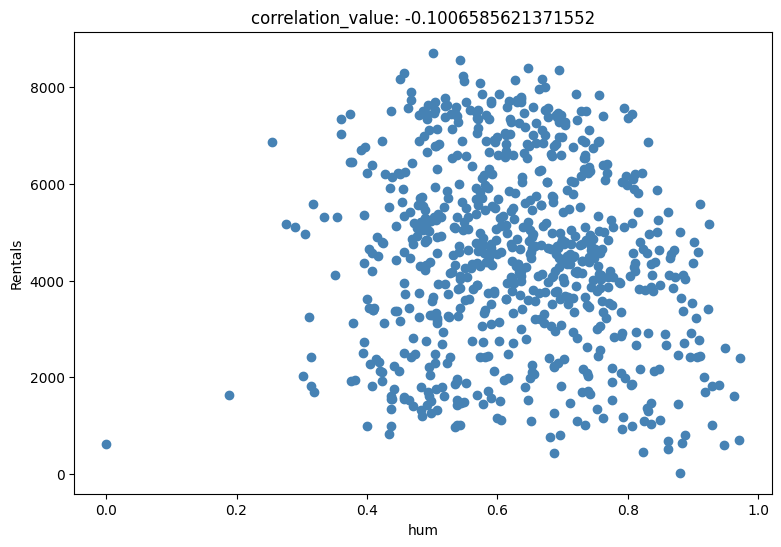

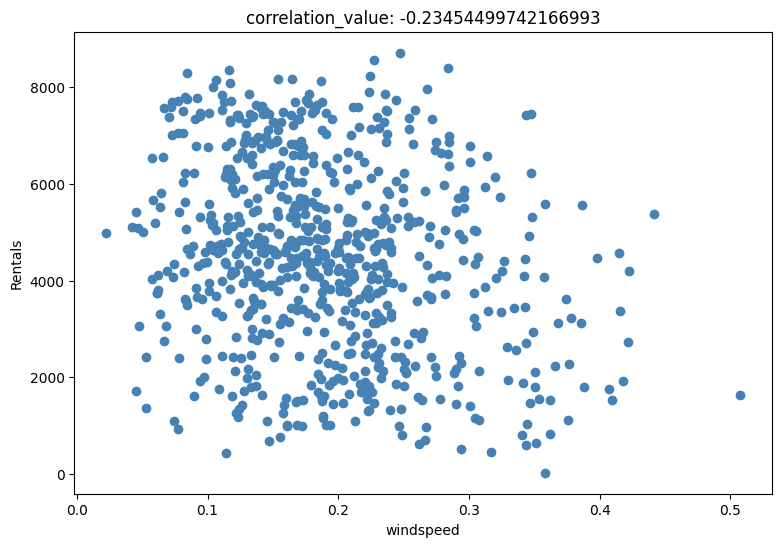

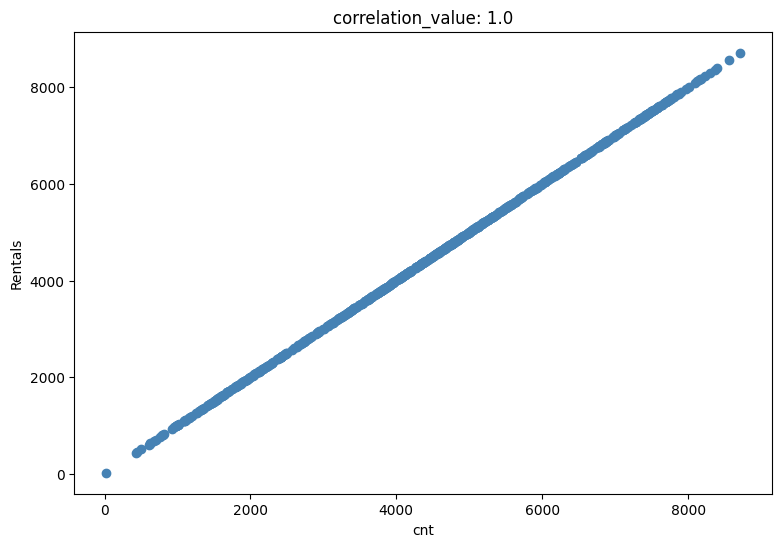

In [26]:
for col in X_numerical:
    correlation_value = bike[col].corr(bike['cnt'])
    fig = plt.figure(figsize=(9, 6))
    plt.scatter(x=bike[col],y=bike['cnt'], color='steelblue')
    plt.title("correlation_value: " + str(correlation_value))
    plt.xlabel(col) 
    plt.ylabel("Rentals")
    plt.show()

# Comparing categorical features with rentals cnt

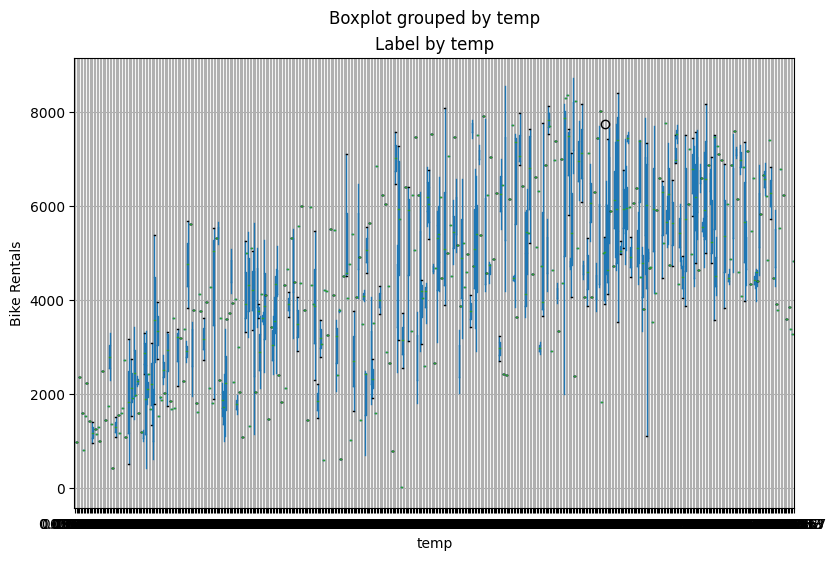

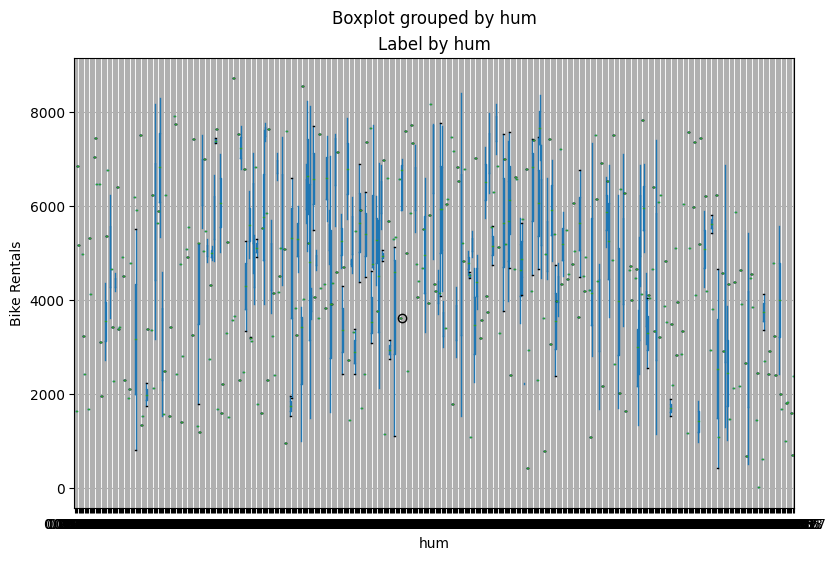

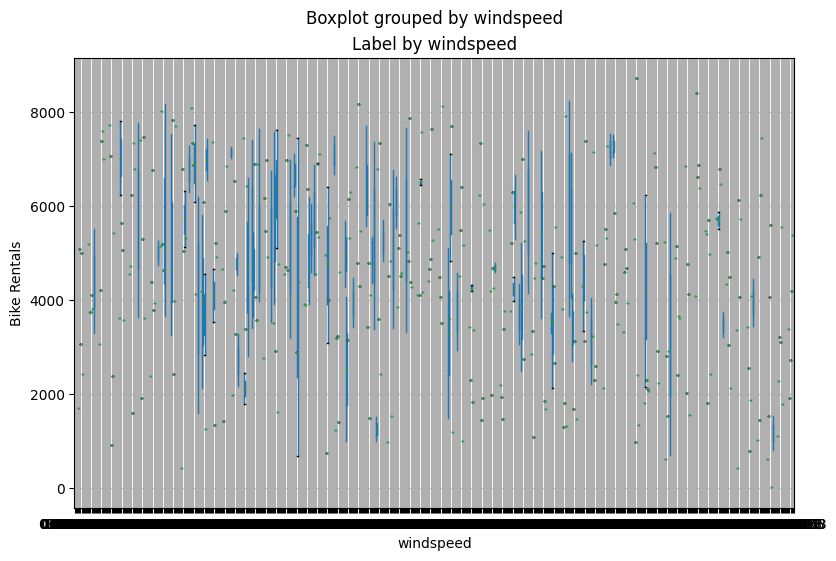

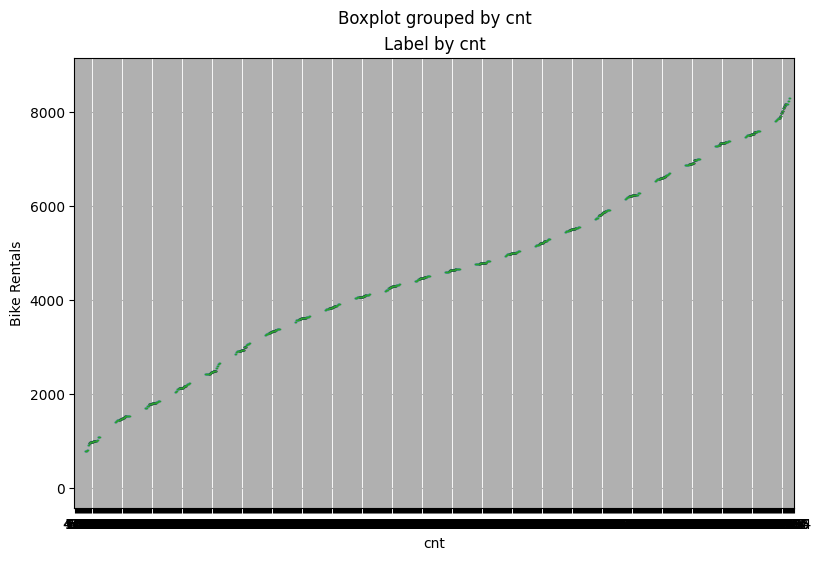

In [27]:
for col in X_numerical:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike.boxplot(column='cnt', by=col, ax=ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

<AxesSubplot:>

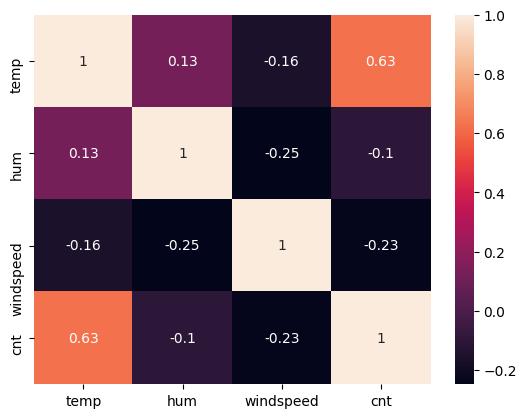

In [28]:
sns.heatmap(X_numerical.corr(), annot =True)

<hr>

# **CREATE TRAINING AND TESTING DATASET**

* Separate features and labels

In [29]:
X = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit','temp', 'hum', 'windspeed']].values
y = bike['cnt'].values


print(f'Features: {X[:5]}, \nLabels: {y[:5]}')

Features: [[1.       0.       1.       0.       6.       0.       2.       0.344167
  0.805833 0.160446]
 [1.       0.       1.       0.       0.       0.       2.       0.363478
  0.696087 0.248539]
 [1.       0.       1.       0.       1.       1.       1.       0.196364
  0.437273 0.248309]
 [1.       0.       1.       0.       2.       1.       1.       0.2
  0.590435 0.160296]
 [1.       0.       1.       0.       3.       1.       1.       0.226957
  0.436957 0.1869  ]], 
Labels: [ 985  801 1349 1562 1600]


* Divide data into 70% for Training and 30% for Testing

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)
print (f'X_train: {X_train.shape} \nX_test: {X_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

X_train: (511, 10) 
X_test: (220, 10) 
y_train: (511,) 
y_test: (220,)


* Linear Regression
* Fit the linear regression on the training set

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [32]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)

print(f'Predicted labels: {np.round(predictions)[:10]}')
print(f'Actual labels: {y_test[:10]}')

Predicted labels: [5099. 5446. 1726. 1262. 4138. 2984. 3574. 6084. 5504. 1349.]
Actual labels: [5923 4592 1248 1360 4075 1817 2659 6234 6857 1167]


* Visualizing a scatter plot that compares the predictions to the actual labels. 
* Overlay a trend line to get a general sense for how well the predicted labels align with the true labels.

Polynomial function:  
0.7489 x + 1134


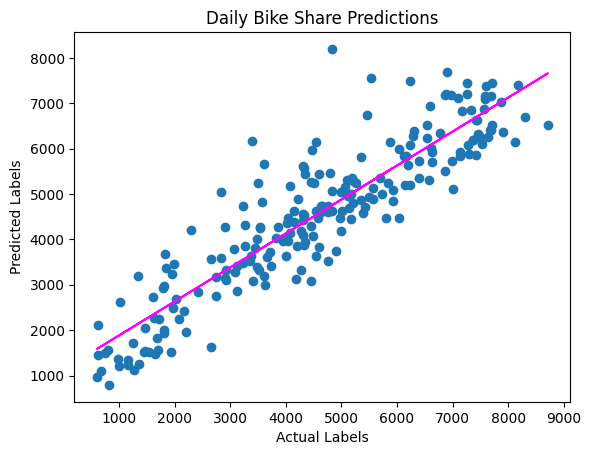

In [33]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.

p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

* Evaluate the Model using MSE, RMSE, R<sup>2</sup>

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

MSE: 790147.6348620006
RMSE: 888.9024889502788
R2: 0.8085470232180891


# **Linear Algorithm**

* Train the regression model by using a Lasso algorithm

Lasso()
MSE: 788648.1385714049
RMSE: 888.0586346471752
R2: 0.8089103515580621
Polynomial function:  
0.7467 x + 1145


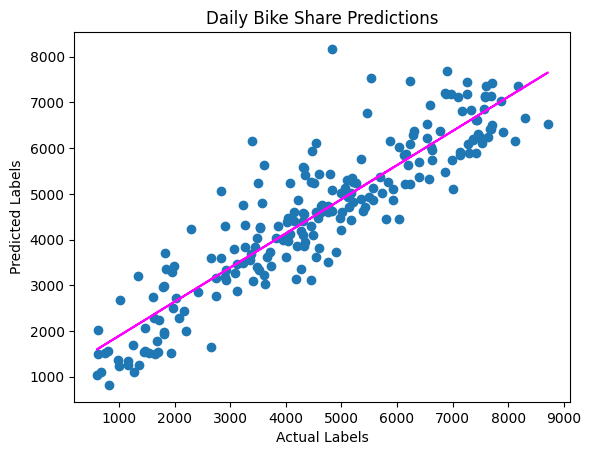

In [35]:
from sklearn.linear_model import Lasso

# Fit Lasso model on training set
model = Lasso().fit(X_train, y_train)
print(model)

# Evaluate the model using text data
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

# **Decision Tree Algorithm**

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Fit decistion tree model on training set alos known as model training
model = DecisionTreeRegressor().fit(X_train, y_train)
print(model)

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor()
|--- feature_7 <= 0.46
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 3.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- feature_8 <= 0.63
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- feature_9 <= 0.19
|   |   |   |   |   |   |   |--- value: [1204.00]
|   |   |   |   |   |   |--- feature_9 >  0.19
|   |   |   |   |   |   |   |--- feature_4 <= 3.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [986.00]
|   |   |   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [1000.00]
|   |   |   |   |   |   |   |--- feature_4 >  3.50
|   |   |   |   |   |   |   |   |--- value: [959.00]
|   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |--- feature_7 <= 0.21
|   |   |   |   |   |   |   |--- feature_7 <= 0.18
|   |   |   |   |   |   |   |   |--- feature_7 <= 0.17
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.19

# **Evaluate the Trained Model**

MSE: 1020820.1454545455
RMSE: 1010.3564447533086
R2: 0.7526550140970182
Polynomial function:  
0.8128 x + 901.7


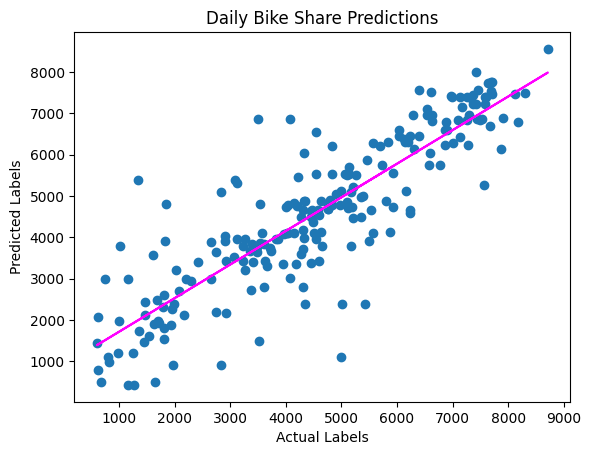

In [37]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

# **Ensemble Algorithm**

* Use Ensemble Algorithm to improve over the linear model

RandomForestRegressor() 

MSE: 434063.99140045454
RMSE: 658.8353295023381
R2: 0.8948261823475955
Polynomial function:  
0.827 x + 882.8


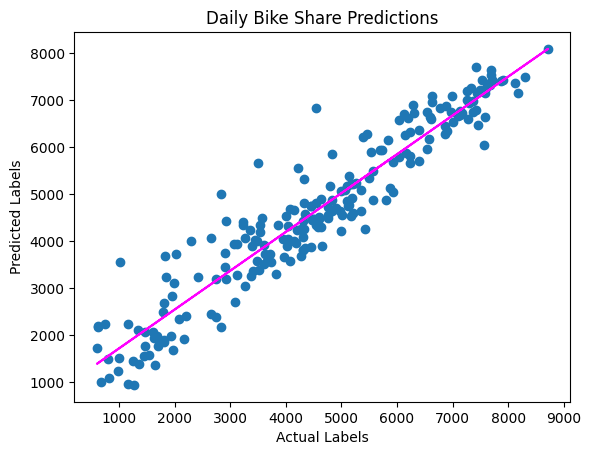

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

* Trying a boosting ensemble algorithm for good measure

GradientBoostingRegressor() 

MSE: 485940.32768017065
RMSE: 697.0942028737369
R2: 0.8822565326174843
Polynomial function:  
0.8528 x + 700.3


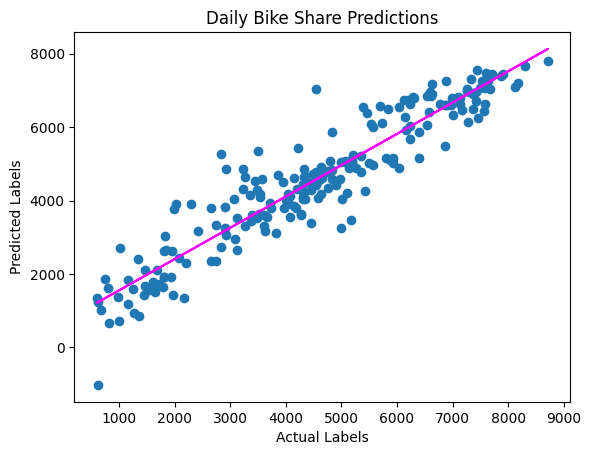

In [39]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2: {r2}')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1) # Fit the polynomial of degree 1 to the points (y_test, predictions). Returns a vector of coefficients z that minimises the squared error in the order deg, deg-1, … 0.
p = np.poly1d(z) # Define the polynimial function
print(f'Polynomial function: {p}')
plt.plot(y_test,p(y_test), color='magenta') # Here  p(y_test) will evaluate the polynomial function for every point in y_test
plt.show()

# **Optimize Hyperparameters**

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

GradientBoostingRegressor(n_estimators=150) 

MSE: 475686.8903898275
RMSE: 689.7005802446649
R2: 0.8847409431312558


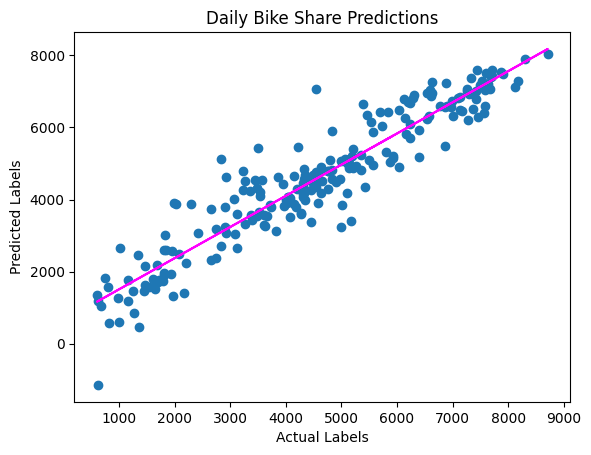

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

* Encoding categorical variables

In [41]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


* Check how the model performs with the validation data

MSE: 480041.12914136867
RMSE: 692.8500047927897
R2: 0.883685909952871


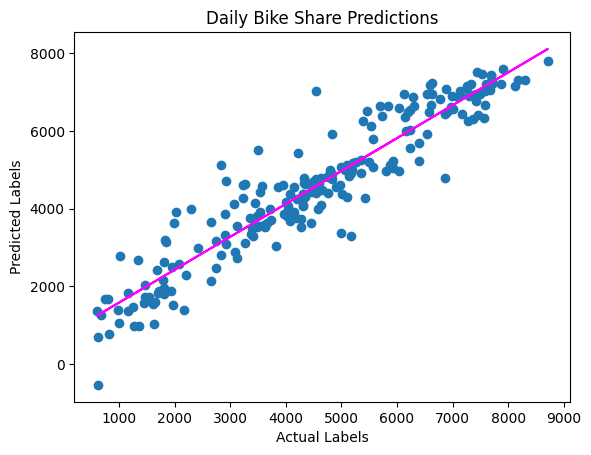

In [42]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

* Try an alternative algorithm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 480249.7626463636
RMSE: 693.0005502496831
R2: 0.8836353580005201


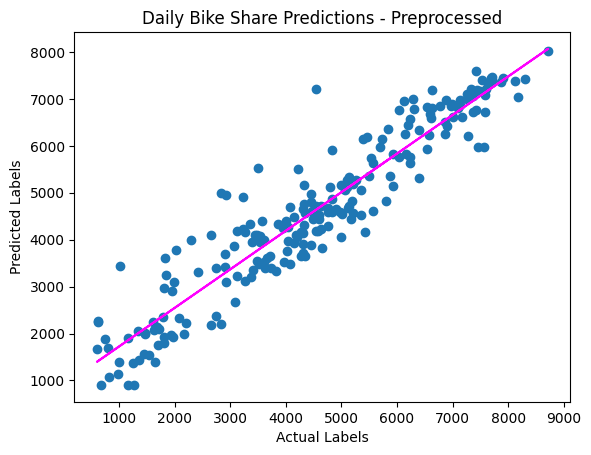

In [43]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# **Use the Trained Model**

* Save the model

In [44]:
import joblib

# Save the model as a pickle file
filename = 'bike-share.pkl'
joblib.dump(model, './inputs/datasets/raw/bike-share.pkl') # Save it at ./inputs/datasets/raw/bike-share.pkl

['./inputs/datasets/raw/bike-share.pkl']

* Load and predict labels for new data

In [45]:
# Load the model from the file
loaded_model = joblib.load('./inputs/datasets/raw/bike-share.pkl')

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 2970 rentals


* Suppose you have a weather forecast for the next five days; you could use the model to predict bike rentals for each day based on the expected weather conditions.

In [46]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
4273.0
4060.0
2834.0
2846.0
3068.0


# Push files to Repo

In [47]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)

bike.to_csv(f"outputs/datasets/collection/bike_sharing_daily.csv", index=False)


[Errno 17] File exists: 'outputs/datasets/collection'
